# 1- Importing Libraries

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2-Loading the Dataset

In [110]:
df=pd.read_csv("cardekho.csv")
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


# 3-Understanding the Dataset

In [113]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [115]:
df.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine                float64
max_power              object
seats                 float64
dtype: object

In [117]:
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [121]:
df.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000,7907.000000,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,19.418783,1458.625016,5.416719
std,4.044249,8.062534e+05,5.655055e+04,4.037145,503.916303,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,16.780000,1197.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,22.320000,1582.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,14.000000


In [123]:
df.nunique()

name                  2058
year                    29
selling_price          677
km_driven              921
fuel                     4
seller_type              3
transmission             2
owner                    5
mileage(km/ltr/kg)     381
engine                 121
max_power              320
seats                    9
dtype: int64

# 4 - Transforming the Dataset/Data Mining

In [135]:
df.rename(columns={"mileage(km/ltr/kg)": "mileage"}, inplace=True)
df["mileage"] = df["mileage"].fillna(df["mileage"].mean())
df["engine"] = df["engine"].fillna(df["engine"].mean())
df["seats"] = df["seats"].fillna(df["seats"].mean())

In [139]:
from sklearn.impute import SimpleImputer
import numpy as np

# Initialize the imputer
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# Fit and transform the specified column
df.iloc[:, 10:11] = imputer.fit_transform(df.iloc[:, 10:11])


In [141]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [143]:
df = df[(df["fuel"] != "CNG") & (df["fuel"] != "LPG")].dropna()
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
new=encoder.fit_transform(df[["fuel"]])
df["fuel"] = new[:,0]
df.rename({"fuel": "Diesel"},axis=1,inplace=True)

In [145]:
df["seller_type"].value_counts()

seller_type
Individual          6673
Dealer              1124
Trustmark Dealer     236
Name: count, dtype: int64

In [147]:
dummies = pd.get_dummies(df["seller_type"])
dummies = dummies.astype(int)
dummies

,Dealer,Individual,Trustmark Dealer
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
8123,0,1,0
8124,0,1,0
8125,0,1,0
8126,0,1,0


In [149]:
df_new = pd.concat([df,dummies],axis=1)
df_new.drop("seller_type",axis=1,inplace=True)
df_new.drop("name",axis=1,inplace=True)

In [151]:
df_new

,year,selling_price,km_driven,Diesel,transmission,owner,mileage,engine,max_power,seats,Dealer,Individual,Trustmark Dealer
0,2014,450000,145500,1.0,Manual,First Owner,23.40,1248.0,74,5.0,0,1,0
1,2014,370000,120000,1.0,Manual,Second Owner,21.14,1498.0,103.52,5.0,0,1,0
2,2006,158000,140000,0.0,Manual,Third Owner,17.70,1497.0,78,5.0,0,1,0
3,2010,225000,127000,1.0,Manual,First Owner,23.00,1396.0,90,5.0,0,1,0
4,2007,130000,120000,0.0,Manual,First Owner,16.10,1298.0,88.2,5.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.0,Manual,First Owner,18.50,1197.0,82.85,5.0,0,1,0
8124,2007,135000,119000,1.0,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0,0,1,0
8125,2009,382000,120000,1.0,Manual,First Owner,19.30,1248.0,73.9,5.0,0,1,0
8126,2013,290000,25000,1.0,Manual,First Owner,23.57,1396.0,70,5.0,0,1,0


In [153]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
new1=encoder.fit_transform(df_new[["transmission"]])
df_new["transmission"] = new1[:,1]
df_new.rename({"transmission": "Manual_Transmission"},axis=1,inplace=True)

In [155]:
df_new

,year,selling_price,km_driven,Diesel,Manual_Transmission,owner,mileage,engine,max_power,seats,Dealer,Individual,Trustmark Dealer
0,2014,450000,145500,1.0,1.0,First Owner,23.40,1248.0,74,5.0,0,1,0
1,2014,370000,120000,1.0,1.0,Second Owner,21.14,1498.0,103.52,5.0,0,1,0
2,2006,158000,140000,0.0,1.0,Third Owner,17.70,1497.0,78,5.0,0,1,0
3,2010,225000,127000,1.0,1.0,First Owner,23.00,1396.0,90,5.0,0,1,0
4,2007,130000,120000,0.0,1.0,First Owner,16.10,1298.0,88.2,5.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.0,1.0,First Owner,18.50,1197.0,82.85,5.0,0,1,0
8124,2007,135000,119000,1.0,1.0,Fourth & Above Owner,16.80,1493.0,110,5.0,0,1,0
8125,2009,382000,120000,1.0,1.0,First Owner,19.30,1248.0,73.9,5.0,0,1,0
8126,2013,290000,25000,1.0,1.0,First Owner,23.57,1396.0,70,5.0,0,1,0


In [157]:
dummies1 = pd.get_dummies(df["owner"])
dummies1 = dummies1.astype(int)
dummies1
df = pd.concat([df_new,dummies1],axis=1)
df.drop("owner",axis=1,inplace=True)

In [159]:
df

,year,selling_price,km_driven,Diesel,Manual_Transmission,mileage,engine,max_power,seats,Dealer,Individual,Trustmark Dealer,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
0,2014,450000,145500,1.0,1.0,23.40,1248.0,74,5.0,0,1,0,1,0,0,0,0
1,2014,370000,120000,1.0,1.0,21.14,1498.0,103.52,5.0,0,1,0,0,0,1,0,0
2,2006,158000,140000,0.0,1.0,17.70,1497.0,78,5.0,0,1,0,0,0,0,0,1
3,2010,225000,127000,1.0,1.0,23.00,1396.0,90,5.0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.0,1.0,16.10,1298.0,88.2,5.0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.0,1.0,18.50,1197.0,82.85,5.0,0,1,0,1,0,0,0,0
8124,2007,135000,119000,1.0,1.0,16.80,1493.0,110,5.0,0,1,0,0,1,0,0,0
8125,2009,382000,120000,1.0,1.0,19.30,1248.0,73.9,5.0,0,1,0,1,0,0,0,0
8126,2013,290000,25000,1.0,1.0,23.57,1396.0,70,5.0,0,1,0,1,0,0,0,0


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  8033 non-null   int64  
 1   selling_price         8033 non-null   int64  
 2   km_driven             8033 non-null   int64  
 3   Diesel                8033 non-null   float64
 4   Manual_Transmission   8033 non-null   float64
 5   mileage               8033 non-null   float64
 6   engine                8033 non-null   float64
 7   max_power             8033 non-null   object 
 8   seats                 8033 non-null   float64
 9   Dealer                8033 non-null   int64  
 10  Individual            8033 non-null   int64  
 11  Trustmark Dealer      8033 non-null   int64  
 12  First Owner           8033 non-null   int64  
 13  Fourth & Above Owner  8033 non-null   int64  
 14  Second Owner          8033 non-null   int64  
 15  Test Drive Car        8033

# 5- Buidling a Model for Predicting Car Price

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Assuming df is your DataFrame with 'selling_price' as the target variable
X = df.drop(["selling_price"], axis=1)
y = df["selling_price"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=300,n_jobs=-1)
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)




# 6-Evaluate model performance

In [166]:

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))  # Compute RMSE manually
print("MAE:", mean_absolute_error(y_test, y_pred))

R² Score: 0.9557848666649543
MSE: 30676938610.734108
RMSE: 175148.33316573157
MAE: 71008.8977793788


In [170]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.9952871511234707
0.9557848666649543


# 7- Testing the prediccted values with actual values

In [173]:
test = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [175]:
test

,Actual,Predicted
7497,275000,232804.051111
4171,400000,401127.992540
3069,320000,303655.000000
3841,650000,650000.000000
322,520000,657275.000000
...,...,...
1010,600000,567724.980000
4857,175000,187496.250000
4381,395000,365150.717500
560,300000,304409.000000


<Axes: xlabel='Actual', ylabel='Predicted'>

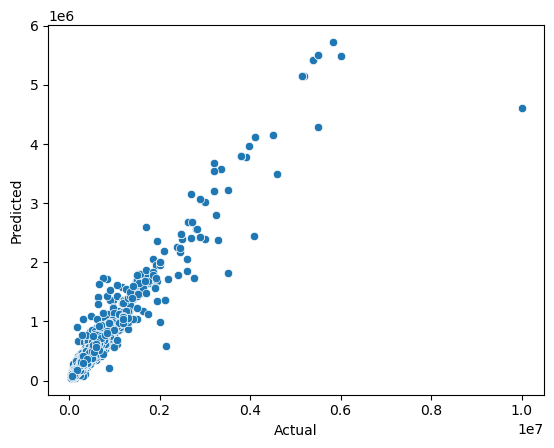

In [179]:
sns.scatterplot(x="Actual",y="Predicted",data=test)